In [145]:
import pandas as pd
import numpy as np
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

warnings.filterwarnings('ignore')

In [146]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [147]:
df.head()

,Unnamed: 0,status,card_present_flag,bpay_biller_code,account,long_lat,txn_description,merchant_id,first_name,balance,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement,annual_salary
0,50,posted,NaN,0,ACC-588564840,151.27 -33.76,PAY/SALARY,NaN,Isaiah,8342.11,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,NaN,credit,105406.65
1,61,posted,NaN,0,ACC-1650504218,145.01 -37.93,PAY/SALARY,NaN,Marissa,2040.58,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,NaN,credit,43914.96
2,64,posted,NaN,0,ACC-3326339947,151.18 -33.80,PAY/SALARY,NaN,Eric,3158.51,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,NaN,credit,26550.72
3,68,posted,NaN,0,ACC-3541460373,145.00 -37.83,PAY/SALARY,NaN,Jeffrey,2517.66,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,NaN,credit,38018.16
4,70,posted,NaN,0,ACC-2776252858,144.95 -37.76,PAY/SALARY,NaN,Kristin,2271.79,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,NaN,credit,28837.08


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 22 columns):
Unnamed: 0           883 non-null int64
status               883 non-null object
card_present_flag    0 non-null float64
bpay_biller_code     883 non-null int64
account              883 non-null object
long_lat             883 non-null object
txn_description      883 non-null object
merchant_id          0 non-null float64
first_name           883 non-null object
balance              883 non-null float64
date                 883 non-null datetime64[ns]
gender               883 non-null object
age                  883 non-null int64
merchant_suburb      0 non-null float64
merchant_state       0 non-null float64
extraction           883 non-null object
amount               883 non-null float64
transaction_id       883 non-null object
customer_id          883 non-null object
merchant_long_lat    0 non-null float64
movement             883 non-null object
annual_salary        883 non-nul

In [149]:
df.columns

Index(['Unnamed: 0', 'status', 'card_present_flag', 'bpay_biller_code',
       'account', 'long_lat', 'txn_description', 'merchant_id', 'first_name',
       'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state',
       'extraction', 'amount', 'transaction_id', 'customer_id',
       'merchant_long_lat', 'movement', 'annual_salary'],
      dtype='object')

In [150]:
col=['Unnamed: 0', 'status', 'card_present_flag', 'bpay_biller_code',
       'account', 'long_lat', 'txn_description', 'merchant_id', 'first_name',
       'balance', 'date', 'gender', 'age', 'merchant_suburb', 'merchant_state',
       'extraction', 'amount', 'transaction_id', 'customer_id',
       'merchant_long_lat', 'movement', 'annual_salary']
for i in col:
    print(i,'\n',df[i].unique(),'\n','No of unique value:',df[i].nunique(),'\n')

Unnamed: 0 
 [   50    61    64    68    70    72    90    92    93    97    98   100
   101   188   199   206   213   222   224   234   235   242   244   337
   348   349   353   354   355   356   357   364   374   382   384   392
   393   394   701   702   705   706   708   712   716   717   718   719
   720   721   725   727   738   741   742   807   815   818   823   827
   833   841   842   849   850   851   853   854   937   938   941   946
   947   951   973   977   978   980   981  1069  1070  1072  1080  1081
  1089  1094  1096  1103  1117  1124  1125  1127  1209  1218  1219  1224
  1225  1227  1235  1243  1244  1253  1255  1262  1263  1264  1598  1602
  1604  1607  1609  1613  1614  1615  1616  1617  1618  1622  1624  1634
  1636  1719  1720  1724  1725  1730  1732  1744  1750  1751  1752  1753
  1755  1826  1835  1838  1842  1844  1849  1858  1872  1874  1876  1880
  1881  1883  1884  1973  1983  1984  1989  1990  1991  1992  1994  2002
  2011  2012  2014  2024  2026  2034  

 ['2018-08-01T11:00:00.000+0000' '2018-08-01T12:00:00.000+0000'
 '2018-08-01T13:00:00.000+0000' '2018-08-01T14:00:00.000+0000'
 '2018-08-01T16:00:00.000+0000' '2018-08-01T17:00:00.000+0000'
 '2018-08-02T11:00:00.000+0000' '2018-08-02T12:00:00.000+0000'
 '2018-08-02T13:00:00.000+0000' '2018-08-02T14:00:00.000+0000'
 '2018-08-02T15:00:00.000+0000' '2018-08-02T16:00:00.000+0000'
 '2018-08-02T17:00:00.000+0000' '2018-08-03T11:00:00.000+0000'
 '2018-08-03T12:00:00.000+0000' '2018-08-03T13:00:00.000+0000'
 '2018-08-03T14:00:00.000+0000' '2018-08-03T15:00:00.000+0000'
 '2018-08-03T16:00:00.000+0000' '2018-08-03T17:00:00.000+0000'
 '2018-08-06T11:00:00.000+0000' '2018-08-06T12:00:00.000+0000'
 '2018-08-06T13:00:00.000+0000' '2018-08-06T14:00:00.000+0000'
 '2018-08-06T17:00:00.000+0000' '2018-08-07T11:00:00.000+0000'
 '2018-08-07T12:00:00.000+0000' '2018-08-07T13:00:00.000+0000'
 '2018-08-07T14:00:00.000+0000' '2018-08-07T15:00:00.000+0000'
 '2018-08-07T16:00:00.000+0000' '2018-08-07T17:00:00.0

In [151]:
df1=df.drop(['Unnamed: 0','card_present_flag','merchant_id','merchant_suburb','merchant_state','merchant_long_lat','bpay_biller_code','status','movement','txn_description'],axis=1)

In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 12 columns):
account           883 non-null object
long_lat          883 non-null object
first_name        883 non-null object
balance           883 non-null float64
date              883 non-null datetime64[ns]
gender            883 non-null object
age               883 non-null int64
extraction        883 non-null object
amount            883 non-null float64
transaction_id    883 non-null object
customer_id       883 non-null object
annual_salary     883 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 82.9+ KB


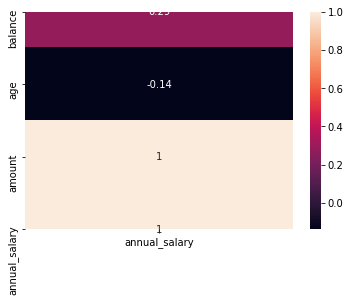

In [153]:
sns.heatmap(pd.DataFrame(df1.corr()['annual_salary']),annot=True)
plt.show()

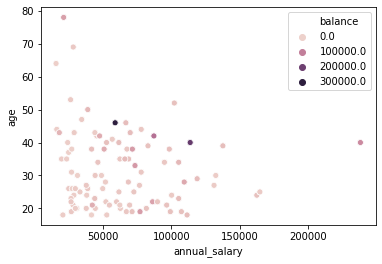

In [154]:
sns.scatterplot(x=df['annual_salary'],y=df['age'],hue=df['balance'])
plt.show()

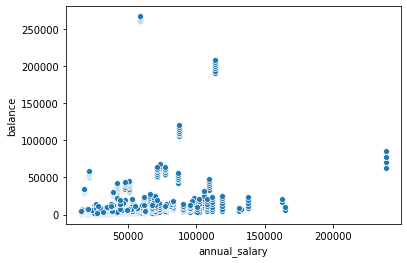

In [155]:
sns.scatterplot(x=df['annual_salary'],y=df['balance'])
plt.show()

>1St conclusion: majority is of salary is 1 to 150K

>2nd conclusion:few of them above 50k and majerity of the balance is 1 to 50k

>3rdconclusion:some them has more expances more than 200k

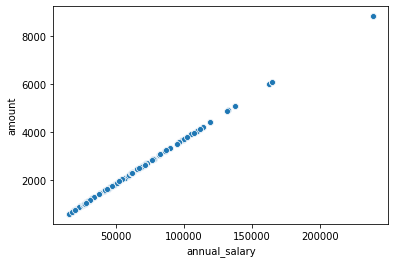

In [156]:
sns.scatterplot(x=df['annual_salary'],y=df['amount'])
plt.show()

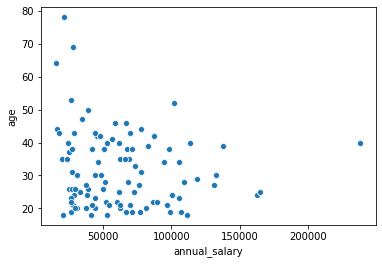

In [157]:
sns.scatterplot(x=df['annual_salary'],y=df['age'])
plt.show()

In [158]:
#regression model to predict 
X=df1.drop(['annual_salary'],axis=1)
y=df1['annual_salary']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [160]:
np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test)

((618, 11), (265, 11), (618,), (265,))

In [161]:
print(X_train)

            account       long_lat first_name   balance       date gender  \
305  ACC-1496451953  145.16 -37.84      Ricky  10942.33 2018-09-03      M   
323  ACC-3954677887  115.72 -32.28       Ruth   5028.43 2018-09-04      F   
794  ACC-2305712452  138.61 -34.89      Debra   7022.35 2018-10-23      F   
90   ACC-3941181087  115.79 -31.94       Paul   3506.06 2018-08-09      M   
827    ACC-38923874  151.27 -33.90       Ryan  45032.02 2018-10-26      M   
..              ...            ...        ...       ...        ...    ...   
106  ACC-3233697971  151.04 -33.77      Robin   3351.90 2018-08-13      F   
270  ACC-2920611728  144.96 -37.76      Tyler   5005.03 2018-08-29      M   
860    ACC-37709441  153.41 -28.01    Charles  23990.99 2018-10-30      M   
435  ACC-1037050564  153.10 -27.66     Rhonda   4146.65 2018-09-17      F   
102   ACC-964839203  146.92 -36.07    Michael  30780.23 2018-08-10      M   

     age                    extraction   amount  \
305   43  2018-09-03T13:

In [162]:
le=LabelEncoder()
df1['gender']=le.fit_transform(df1['gender'])

In [163]:
df1['account']=le.fit_transform(df1['account'])

In [164]:
df1

,account,long_lat,first_name,balance,date,gender,age,extraction,amount,transaction_id,customer_id,annual_salary
0,89,151.27 -33.76,Isaiah,8342.11,2018-08-01,1,23,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,105406.65
1,19,145.01 -37.93,Marissa,2040.58,2018-08-01,0,23,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,43914.96
2,63,151.18 -33.80,Eric,3158.51,2018-08-01,1,22,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,26550.72
3,68,145.00 -37.83,Jeffrey,2517.66,2018-08-01,1,24,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,38018.16
4,50,144.95 -37.76,Kristin,2271.79,2018-08-01,0,43,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,28837.08
...,...,...,...,...,...,...,...,...,...,...,...,...
878,28,115.78 -31.90,Antonio,9378.51,2018-10-31,1,26,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,CUS-1646621553,29670.57
879,93,145.04 -37.85,Michele,3440.01,2018-10-31,0,30,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,CUS-1271030853,31270.05
880,55,144.96 -37.76,Tyler,11381.44,2018-10-31,1,69,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,CUS-1388323263,28164.24
881,24,150.68 -33.79,Susan,11454.52,2018-10-31,0,20,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,CUS-164374203,37678.23


In [165]:
X=df1[['account','gender','age','amount','balance']]
y=df1['annual_salary']

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [167]:
np.shape(X_train),np.shape(X_test),np.shape(y_train),np.shape(y_test)

((618, 5), (265, 5), (618,), (265,))

In [168]:
from sklearn.linear_model import LinearRegression

In [169]:
ir = LinearRegression()
ir.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
ir_predict=ir.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error

In [171]:
r2_score(y_test,ir_predict)

1.0

In [172]:
np.sqrt(mean_squared_error(y_test,ir_predict))

5.835366192092726e-11

here we can see that the error is showing very less and it;s 

In [173]:
lrtrain_predict=ir.predict(X_train)

In [174]:
r2_score(y_train,lrtrain_predict)

1.0

In [175]:
print(lrtrain_predict)

[ 69876.27  34356.69  20555.91  72571.95  50785.65 111570.21  77077.98
  43914.96  34356.69 107391.42  26533.17  26550.72  96623.55  15552.
  62648.1   67104.99  46207.53  48832.74  37678.23 105400.71  37698.21
 105400.71  62648.1   21125.34  27369.09  46207.53  26202.69  33083.91
  37678.23  24086.43  24771.15  51745.77  49764.78  26533.17  61569.72
  44019.72  26550.72 118943.1   31270.05  49764.78  38717.46  65967.48
  30747.33  24859.17  26898.48  30747.33  45402.66  67104.99  38798.46
  44191.44  68544.36 100239.12  24859.17  28837.08 137794.77  82920.78
  37698.21  51745.77  38717.46  81727.65  29691.9   77958.18  26202.69
  82920.78  24771.15  68708.52  26898.48  82920.78  65967.48  28615.68
 102216.06  52557.39  58858.92  50785.65  65967.48  38018.16  65967.48
 137794.77  26744.85  29691.9   68708.52  69468.57  65967.48  54639.36
  77936.04  29670.57  37698.21  51745.77 238571.46  58858.92  17939.61
  62334.09  50785.65  41517.36  41517.36  71273.52  77936.04 105400.71
  16100.

In [176]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
44,87244.02,87244.02
806,38018.16,38018.16
720,107391.42,107391.42
660,27057.51,27057.51
878,29670.57,29670.57
...,...,...
420,102216.06,102216.06
363,66702.15,66702.15
368,49764.78,49764.78
172,69876.27,69876.27


>Now compare the actual output values for X_test with the predicted values